In [1]:
import os, matplotlib.pyplot as plt, numpy as np, pylab, csv

In [2]:
# Global variables


In [3]:
def format_original_data(path_to_original_data, path_to_formatted_data):
    """
    Format the original data
    given the path to the data
    """
    # Clear write to file
    open(path_to_formatted_data,'w')
    
    # List all the time and measurements
    time_list, data_list = [], []
    with open(path_to_original_data,'r') as ReadFile:
        print("Reading: " + str(path_to_original_data))
        for row in ReadFile:
            row = row.split()
            for item in row:
                data_list.append(item)
    ReadFile.close()
    
    for item in data_list:
        if item[0].isdigit() == True: 
            if  ":" in item:
                time_list.append(item) 
           
    time_list_hours = list(range(len(time_list)))
    
    for i in range(len(time_list)):
        for j in range(len(data_list)):
            if time_list[i] == data_list[j]:   
                time_point_list = data_list[j : j + 98]
        
        with open(path_to_formatted_data,'a') as WriteFile:
            for item in time_point_list:
                
                WriteFile.write(str(item)  + ' , ')  
            WriteFile.write('\n') 
        ReadFile.close()
        
    return(time_list_hours)
    

In [4]:
def collect_measurments_from_formatted_data(i, path_to_formatted_data):
    """
    From the well number and path to formatted data
    Build a list of measurements for that well
    """
    
    well_reading_list = []
    
    with open(path_to_formatted_data,'r') as ReadFile:
        for row in ReadFile:
                
            row = row.split(',')
            well_reading_list.append(float(row[i+2]))
                
        ReadFile.close()
    
    return(well_reading_list)


In [5]:
def read_in_measurements():
    """
    Read in the measurements from the original measurements.
    """
    # Specify the path to the original and formatted measurements. 
    path_to_original_data_405 = os.path.join("Test 2019-03-15", "Data Original", "Data 03-15-19-131847_405" + ".txt")
    path_to_formatted_data_405 = os.path.join("Test 2019-03-15", "Data Formatted", "Formatted Data 03-15-19-131847 405 nm" + ".csv")
    time_list_hours = format_original_data(path_to_original_data_405, path_to_formatted_data_405)
    
    path_to_original_data_650 = os.path.join("Test 2019-03-15", "Data Original", "Data 03-15-19-131847_650" + ".txt")
    path_to_formatted_data_650 = os.path.join("Test 2019-03-15", "Data Formatted", "Formatted Data 03-15-19-131847 650 nm" + ".csv")
    time_list_hours = format_original_data(path_to_original_data_650, path_to_formatted_data_650)
    
    
    for i in range(96):
        
        fig_columns, fig_rows, subplot_number = 3, 1, 0
        fig = plt.figure(figsize=(fig_columns*7,fig_rows*5))
        
        subplot_number += 1
        plt.subplot(fig_rows, fig_columns, subplot_number)
    
        well_reading_list = collect_measurments_from_formatted_data(i, path_to_formatted_data_405)
        plt.scatter(time_list_hours, well_reading_list, label= "405 nm", c = 'red') 
        
        letter_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M"]
        well_name = str(letter_list[int((i)/12)]) + str((i+1)%12)
      
        plt.title("Well " + well_name + "   Well No: " + str(i+1))
        plt.xlabel("Time Lapsed (Hours)")
        plt.ylabel("Absorbance (450 nm)")
        path_save_filename = os.path.join("Test 2019-03-15", "Figures", "Scatter Plot " + str(i+1) + " " + well_name + ".png")
        plt.savefig(path_save_filename)
        plt.legend()
        
        subplot_number += 1
        plt.subplot(fig_rows, fig_columns, subplot_number)
    
        well_reading_list = collect_measurments_from_formatted_data(i, path_to_formatted_data_650)
        plt.scatter(time_list_hours, well_reading_list, label= "650 nm", c = 'blue') 
        
        letter_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M"]
        well_name = str(letter_list[int((i)/12)]) + str((i+1)%12)
      
        plt.title("Well " + well_name + "   Well No: " + str(i+1))
        plt.xlabel("Time Lapsed (Hours)")
        plt.ylabel("Absorbance (600 nm)")
        path_save_filename = os.path.join("Test 2019-03-15", "Figures", "Scatter Plot " + str(i+1) + " " + well_name + ".png")
        plt.savefig(path_save_filename)
        plt.legend()
        
        subplot_number += 1
        plt.subplot(fig_rows, fig_columns, subplot_number)
    
        well_reading_list = collect_measurments_from_formatted_data(i, path_to_formatted_data_405)
        plt.scatter(time_list_hours, well_reading_list, label= "405 nm", c = 'red') 
        
        well_reading_list = collect_measurments_from_formatted_data(i, path_to_formatted_data_650)
        plt.scatter(time_list_hours, well_reading_list, label = "650 nm", c = 'blue') 
        
        letter_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M"]
        well_name = str(letter_list[int((i)/12)]) + str((i+1)%12)
              
        plt.title("Well " + well_name + "   Well No: " + str(i+1))
        plt.xlabel("Time Lapsed (Hours)")
        plt.ylabel("Both Absorbance (nm)")
        path_save_filename = os.path.join("Test 2019-03-15", "Figures", "Scatter Plot " + str(i+1) + " " + well_name + ".png")
        plt.savefig(path_save_filename)
        plt.legend()
        
        plt.show()
  

In [6]:
def calculate_growth_curve_slope():
    """
    From the plate reader measurements, 
    calculate the slope of the growth curves
    for each of the 96 wells. Return a list
    of slopes for well.
    """
    # Collect measurements
    read_in_measurements()
    
    slopes = 1
    
    return(slopes)

In [ ]:
def main():
    """
    Determine the slope of the growth curve
    Scatter plot growth curve with the thickness of the membrane.
    """
    
    # Calculate the slope of the growth curve
    slopes = calculate_growth_curve_slope()

Reading: Test 2019-03-15/Data Original/Data 03-15-19-131847_405.txt
Reading: Test 2019-03-15/Data Original/Data 03-15-19-131847_650.txt


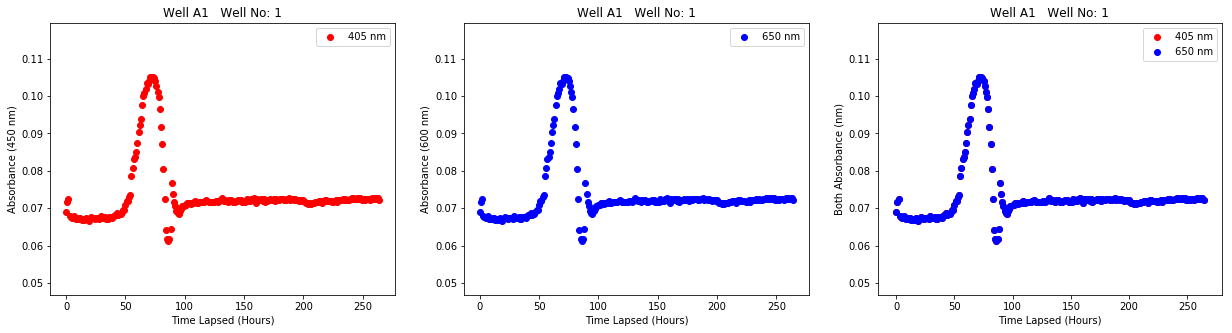

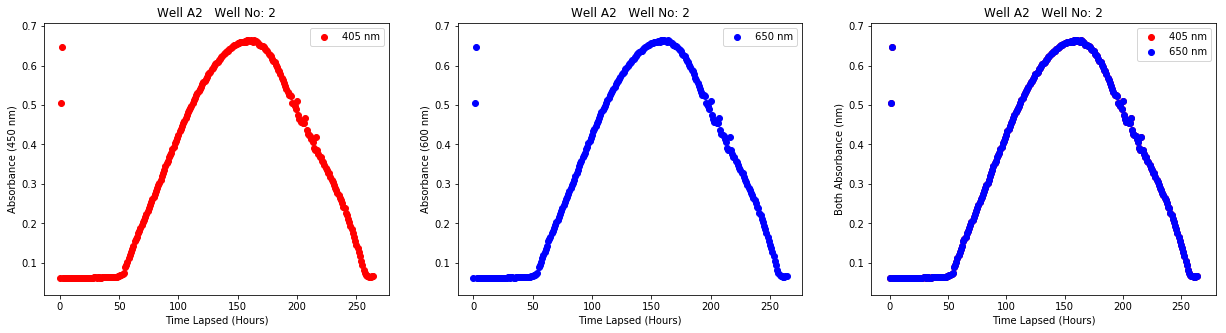

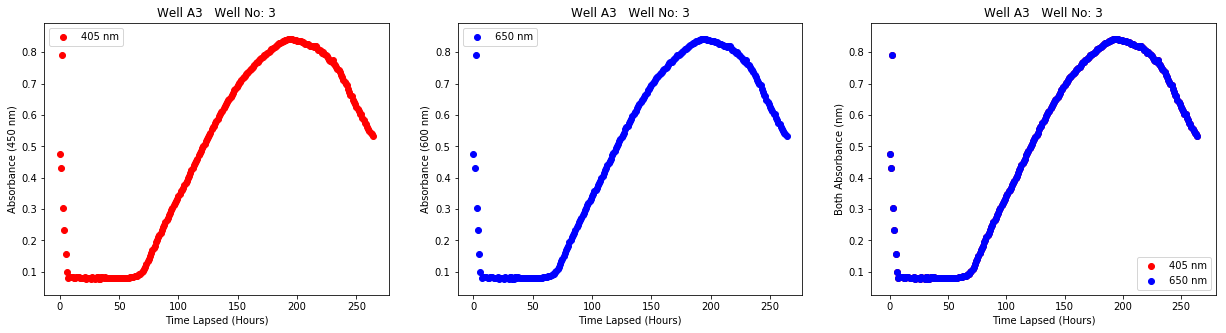

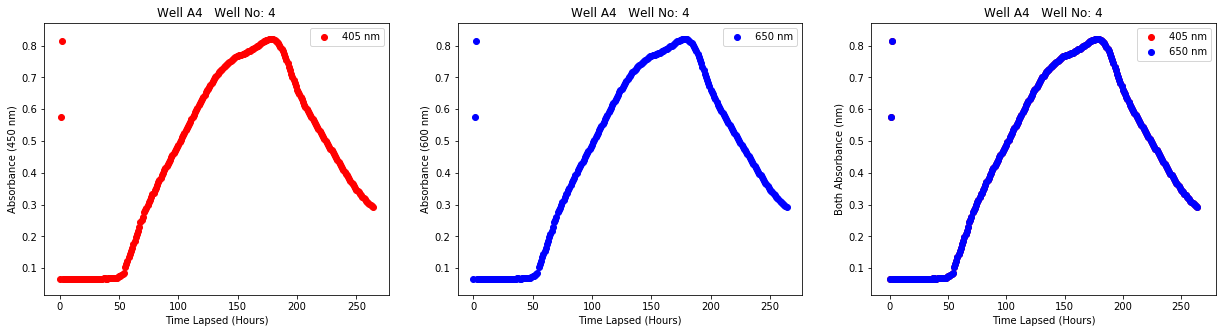

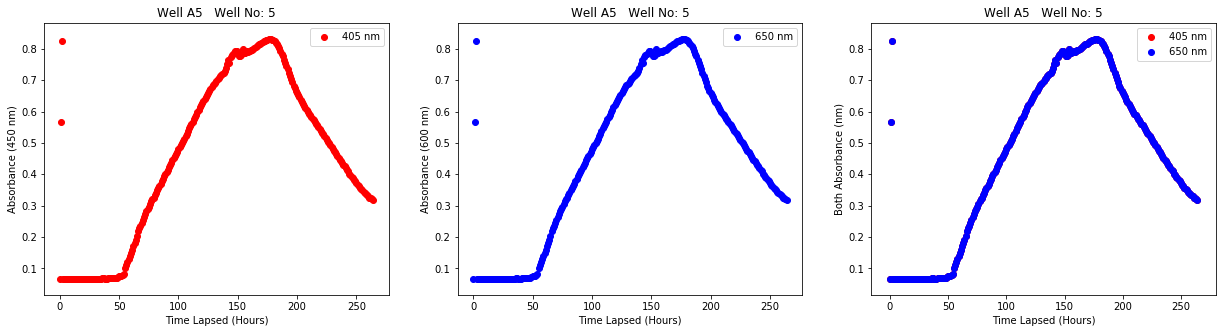

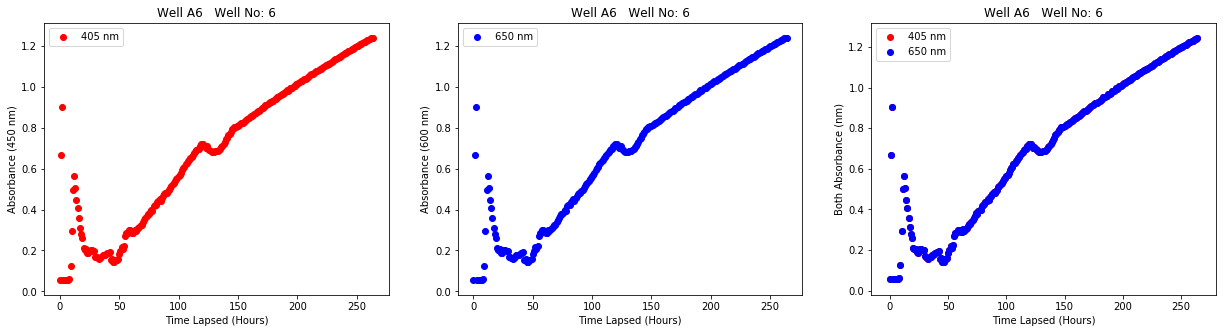

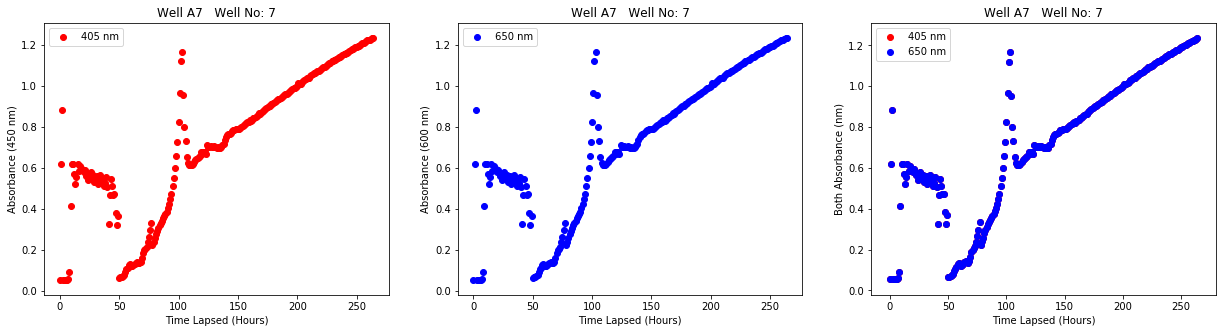

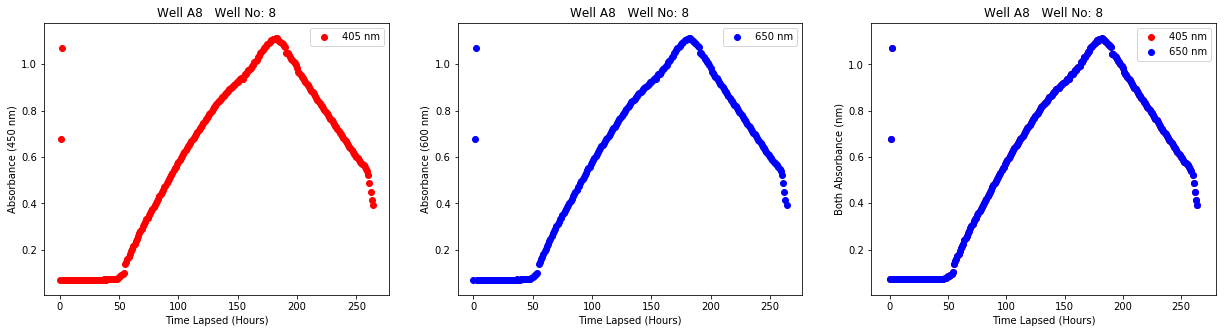

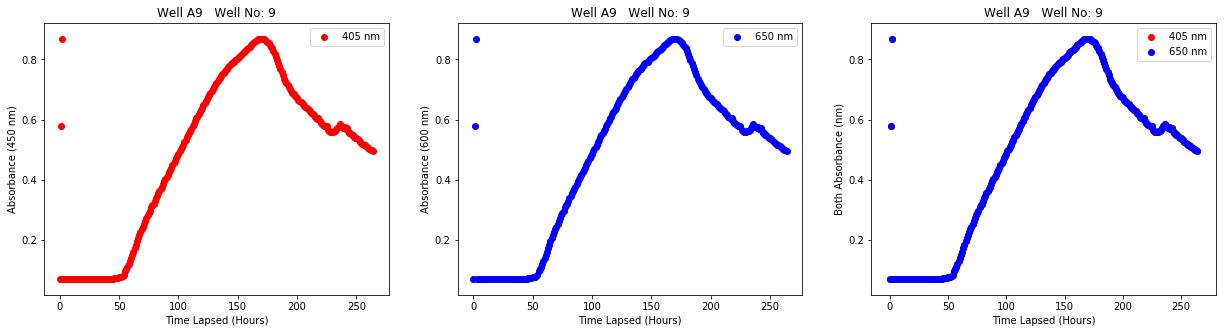

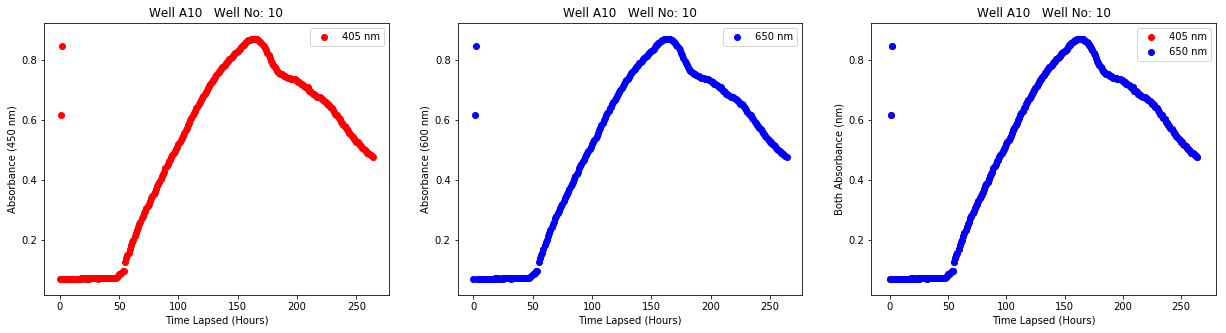

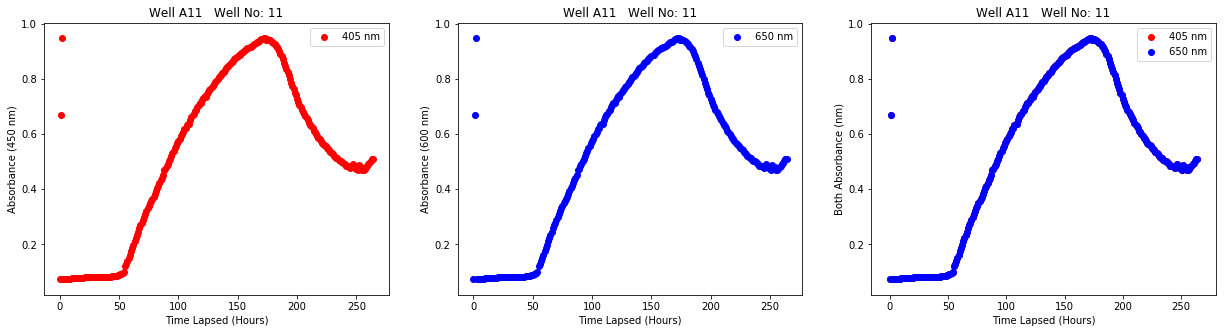

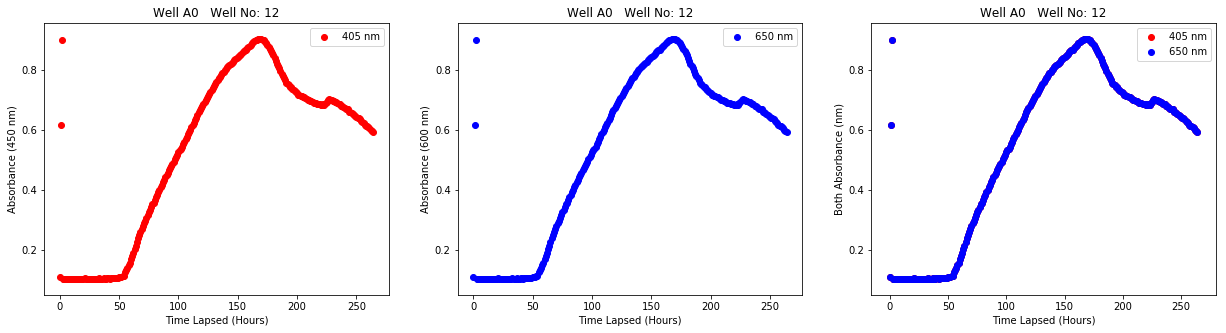

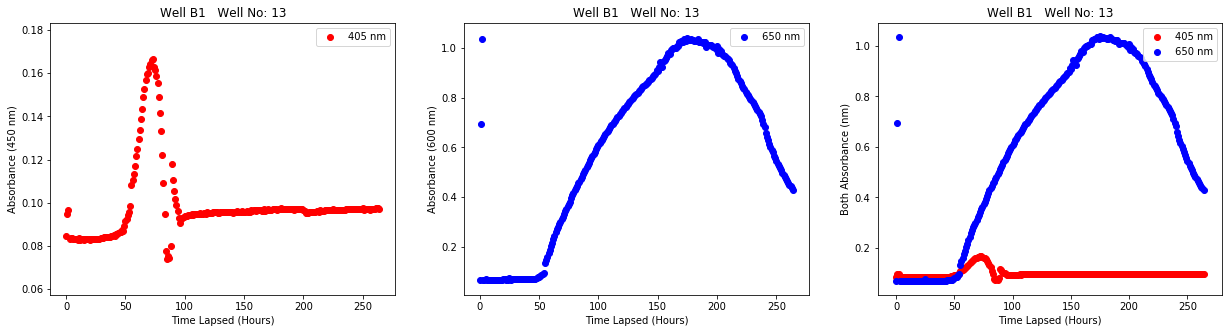

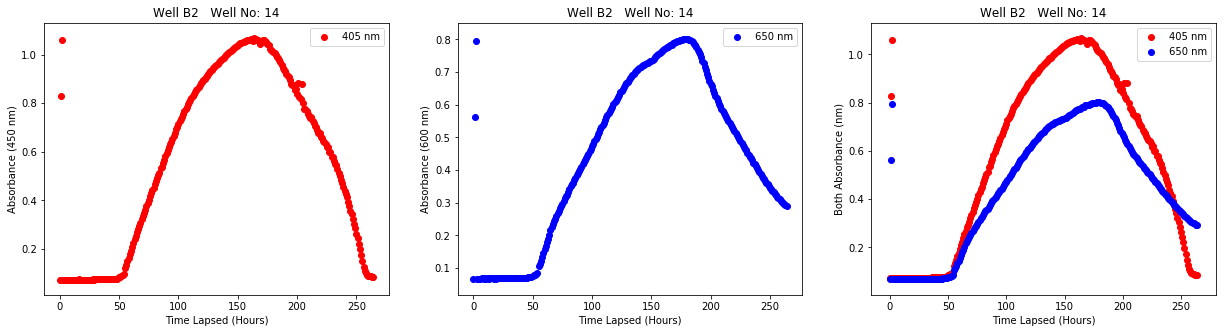

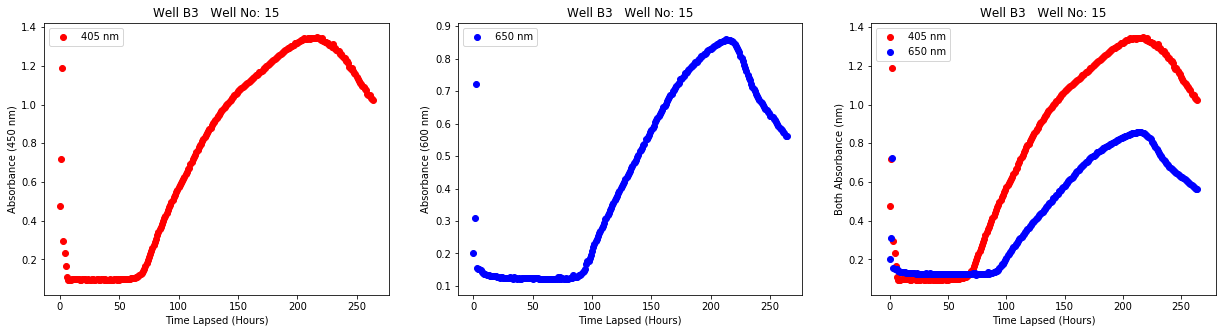

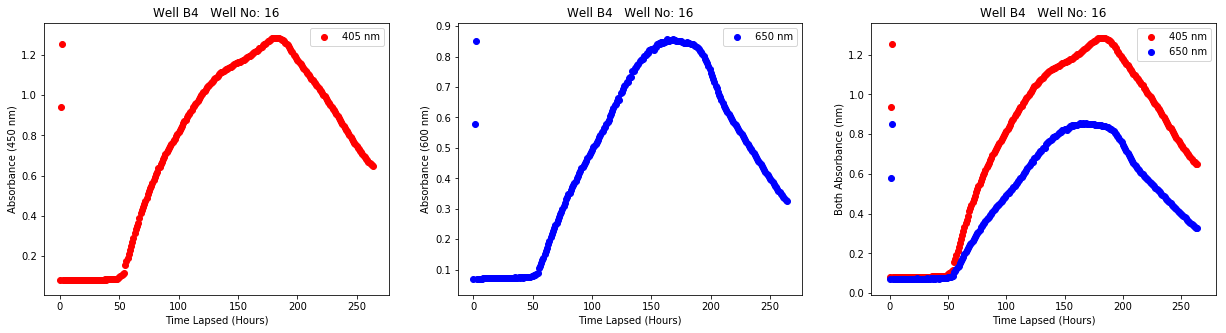

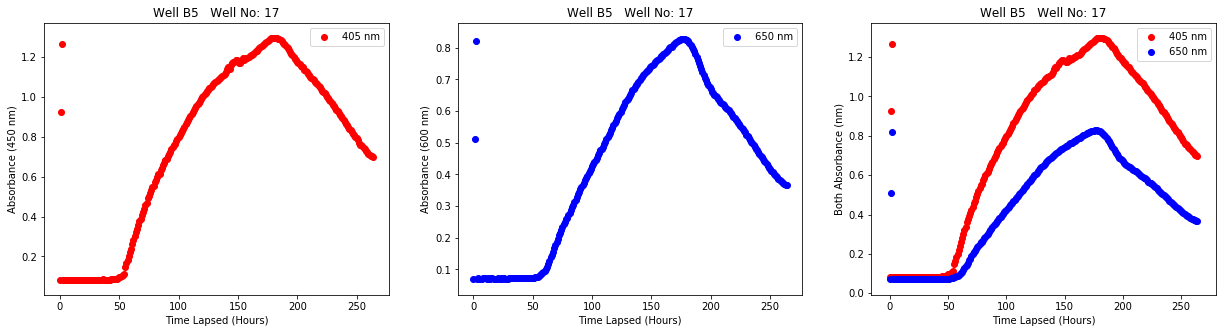

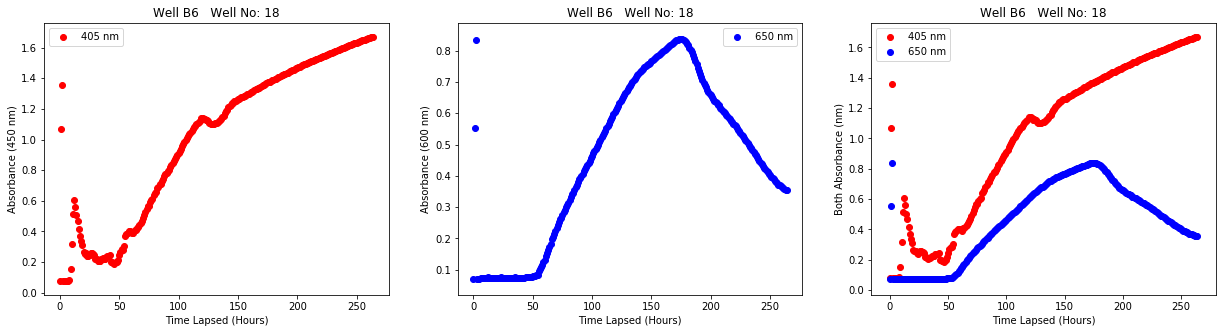

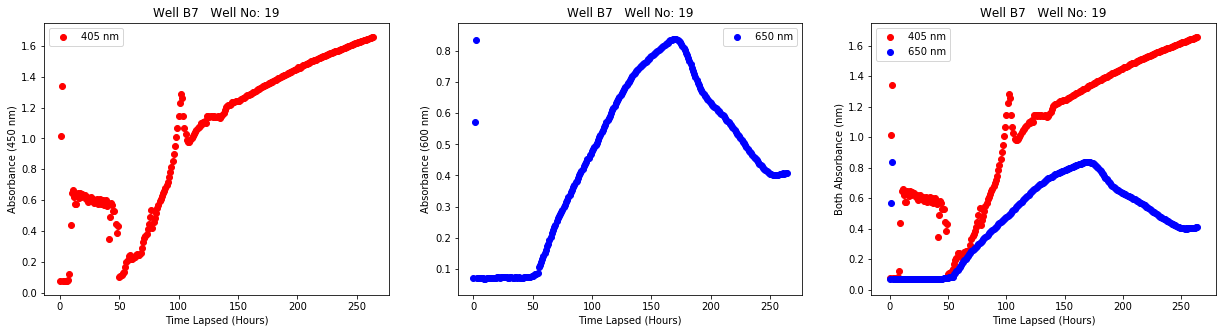

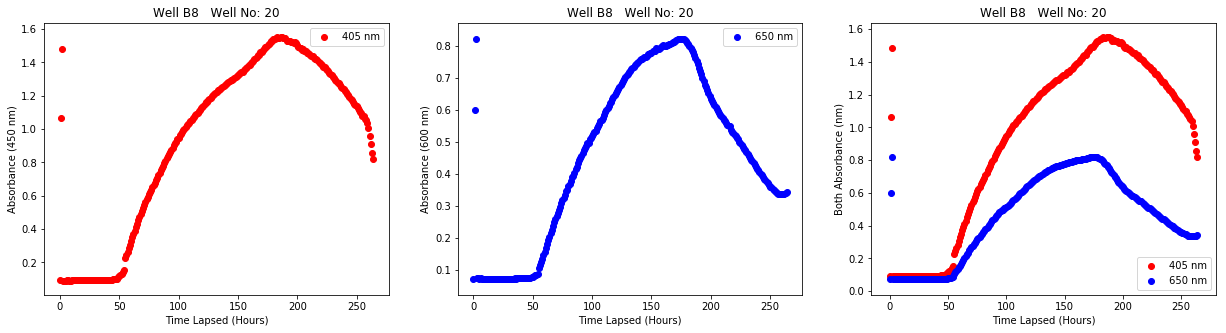

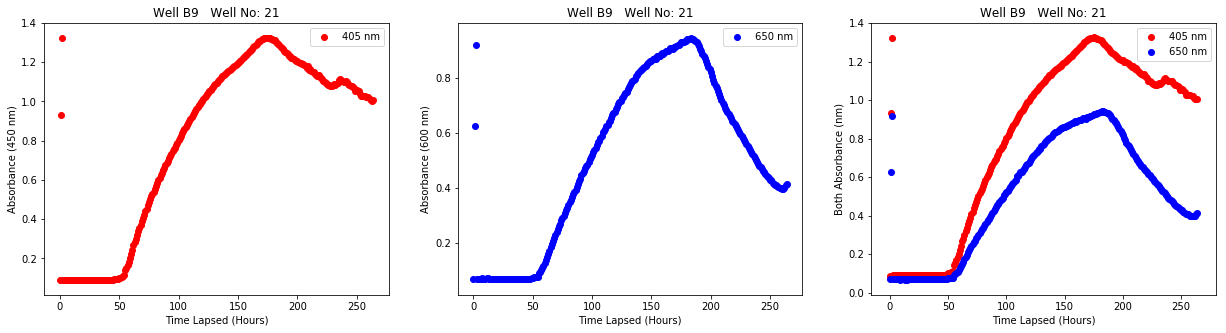

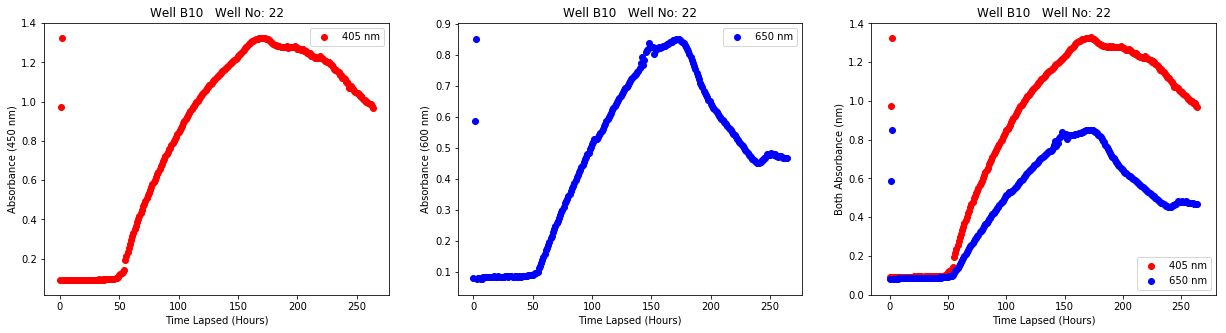

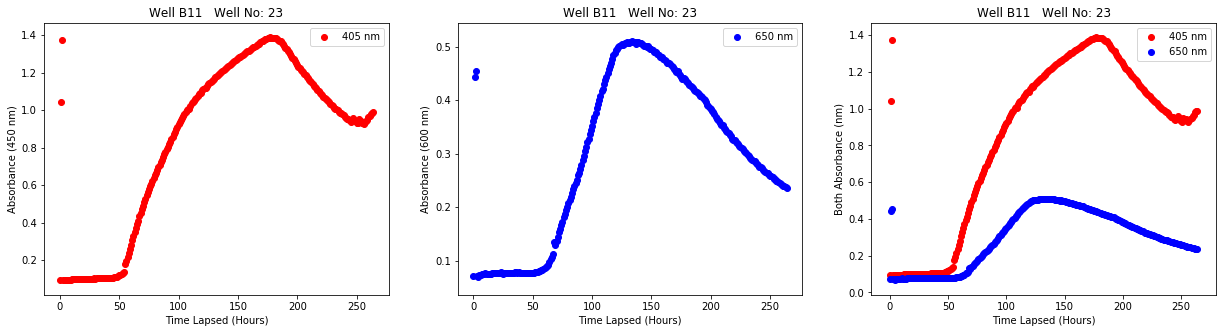

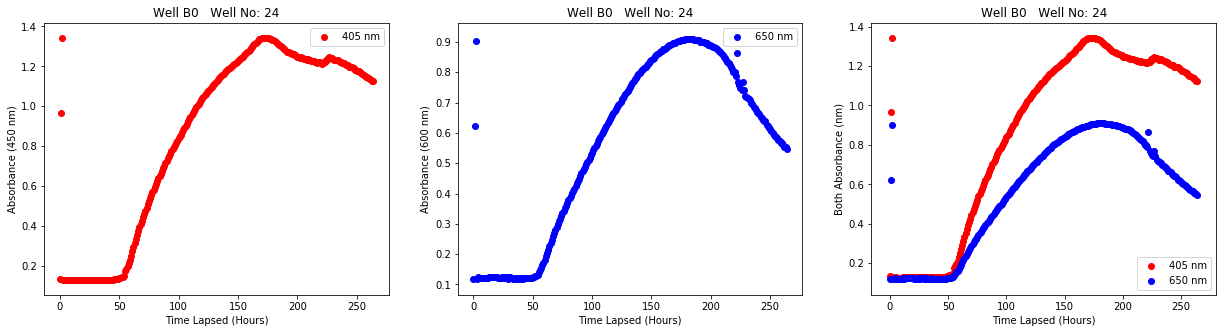

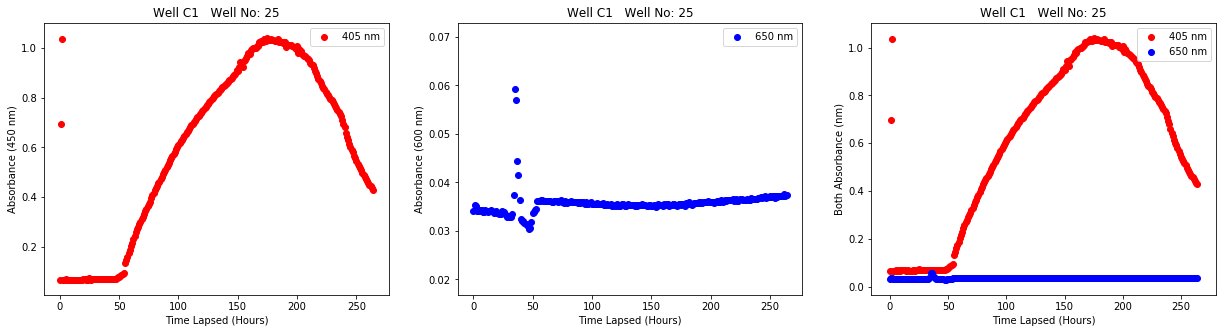

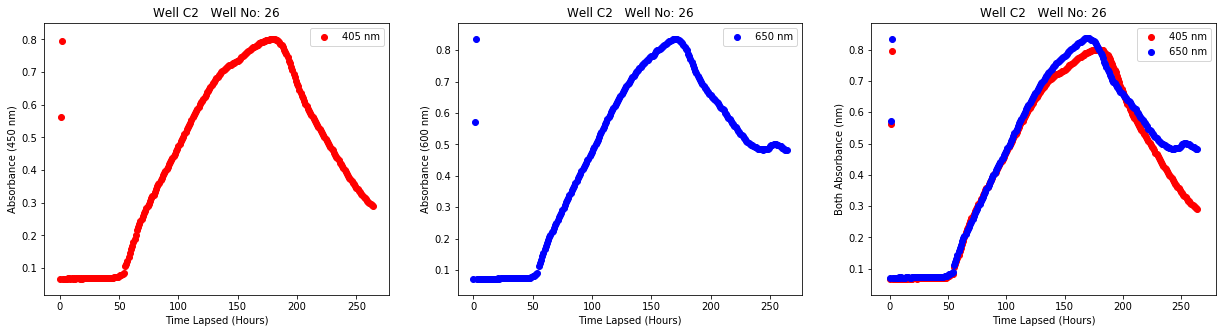

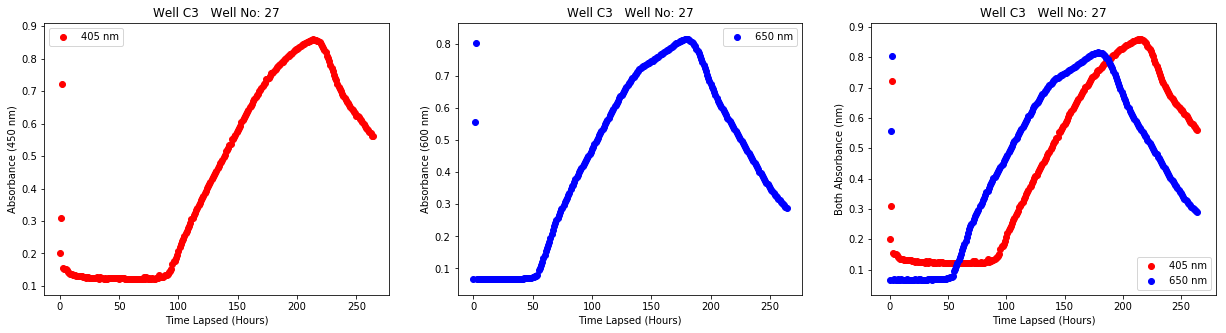

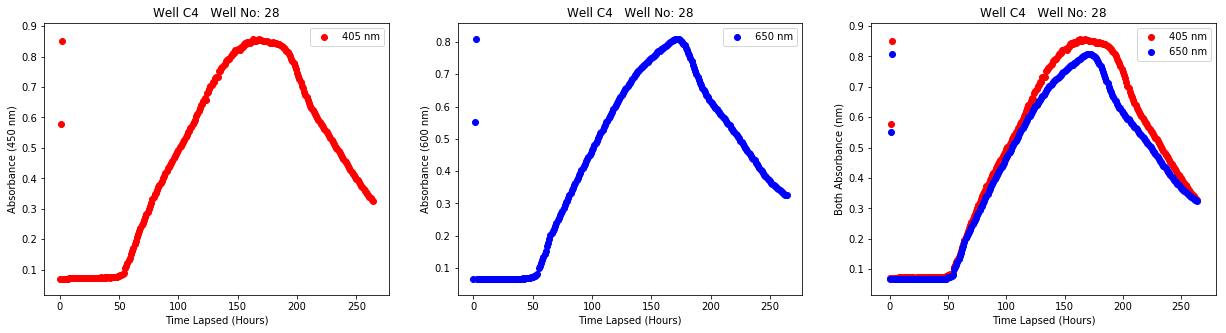

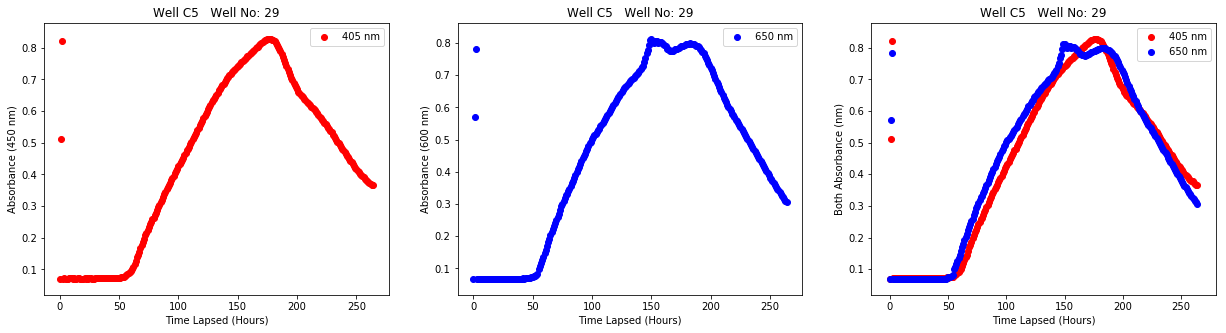

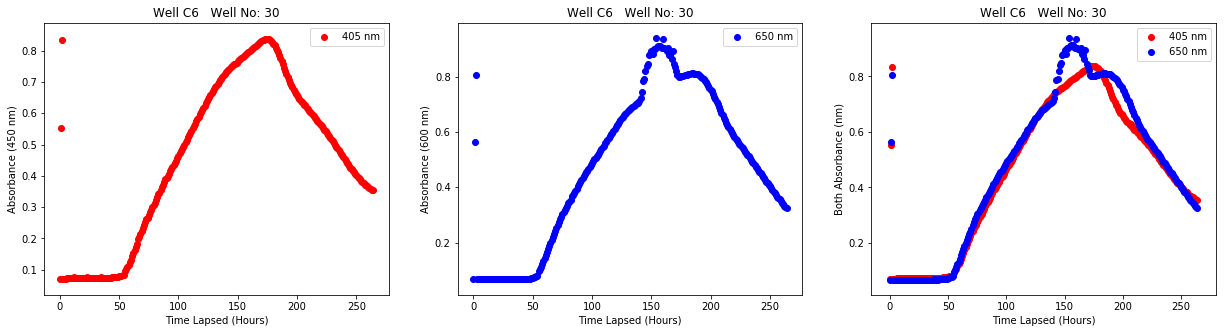

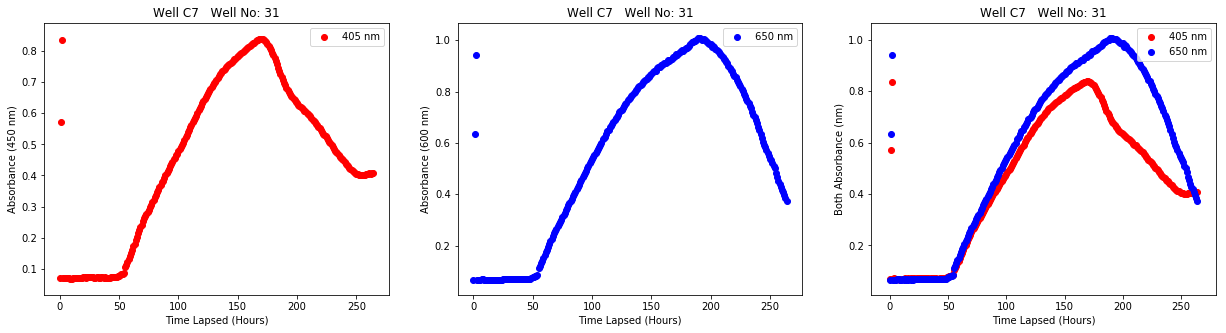

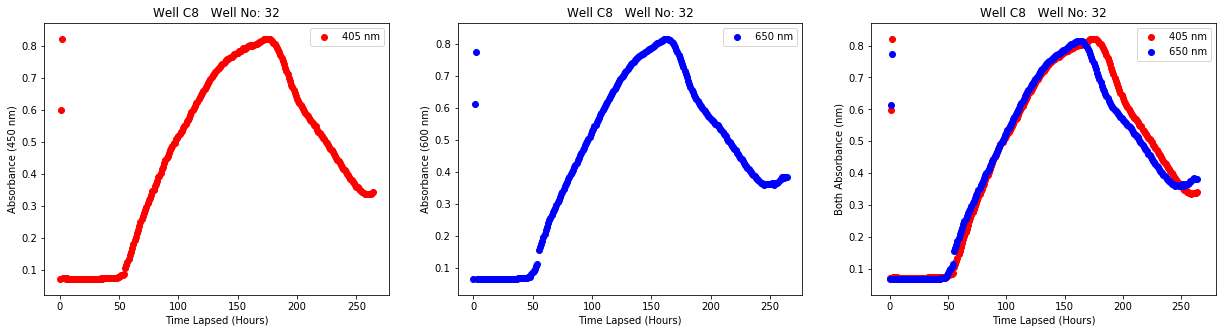

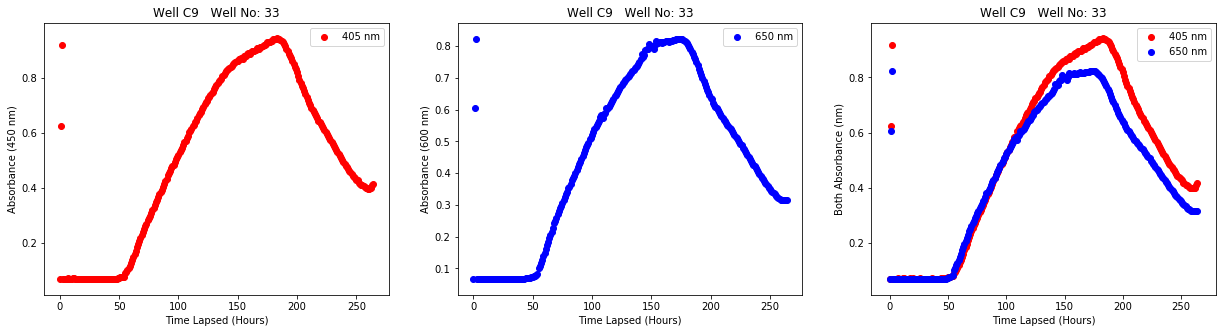

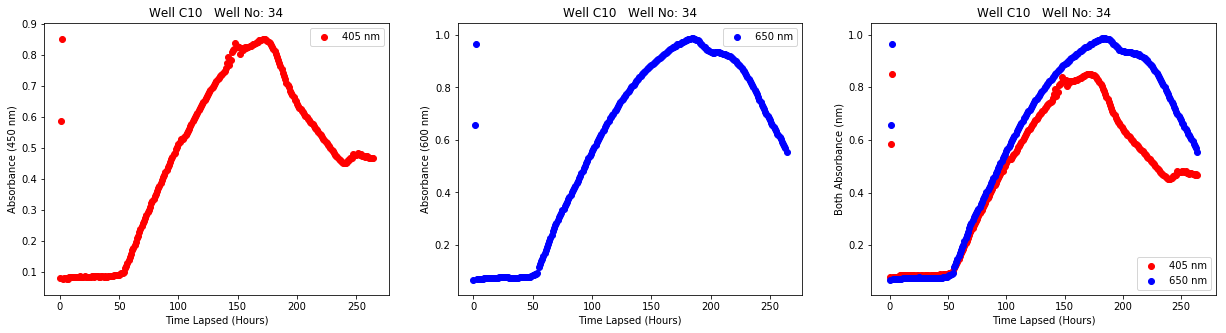

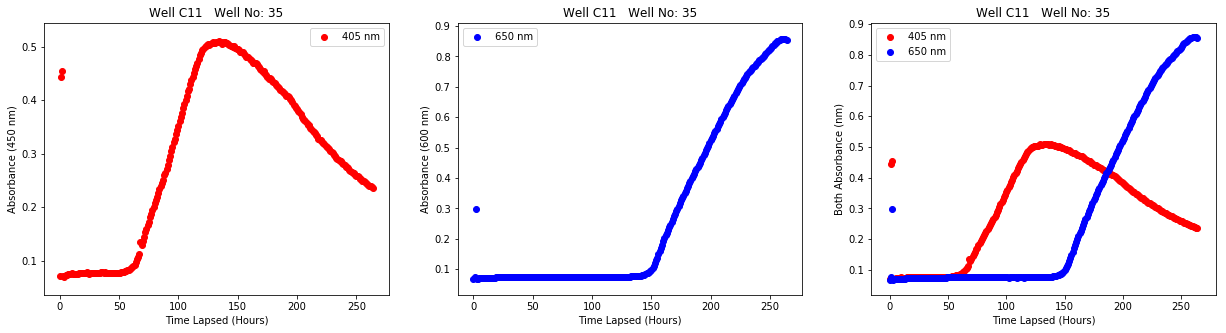

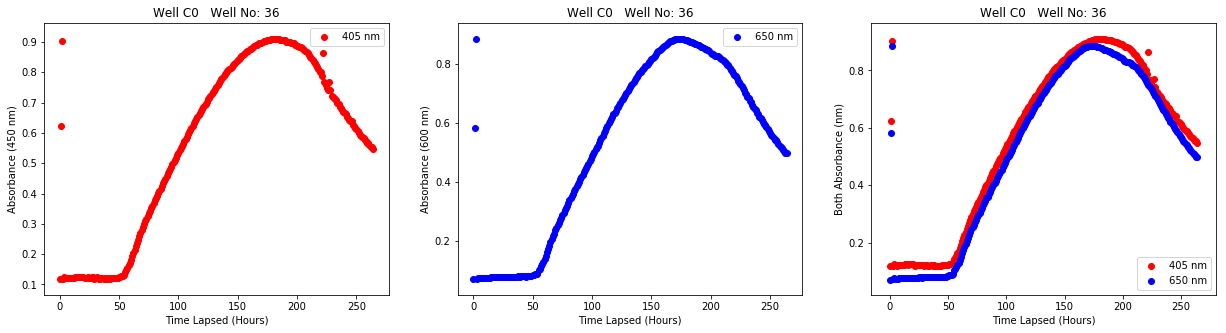

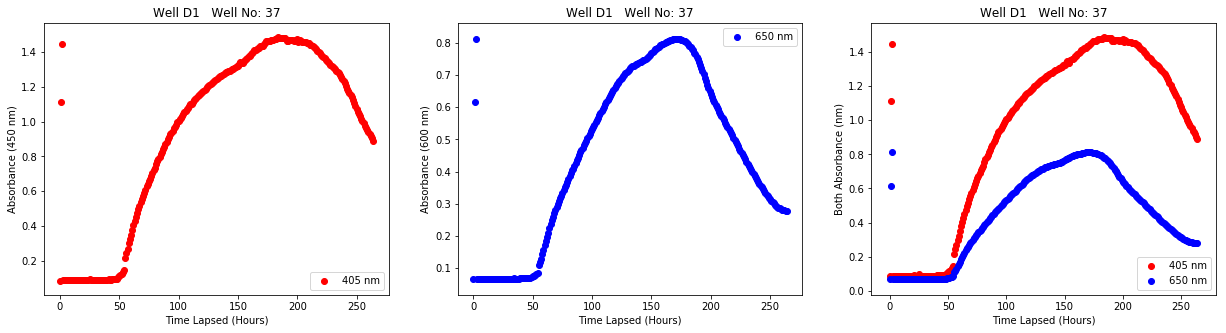

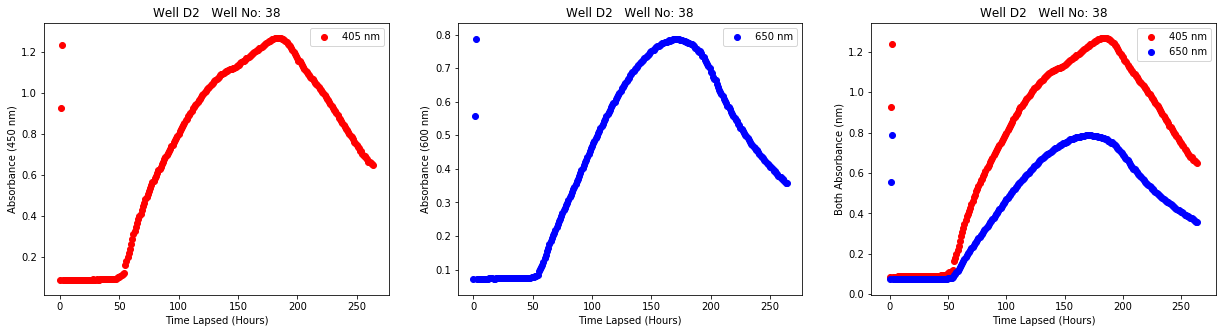

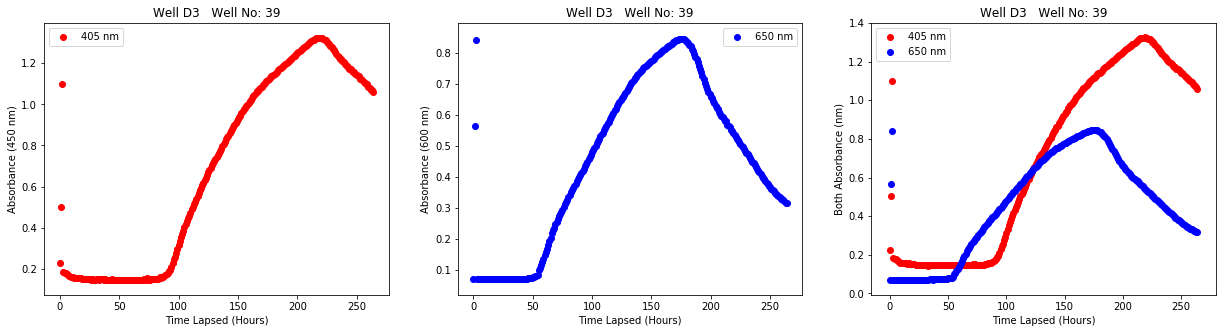

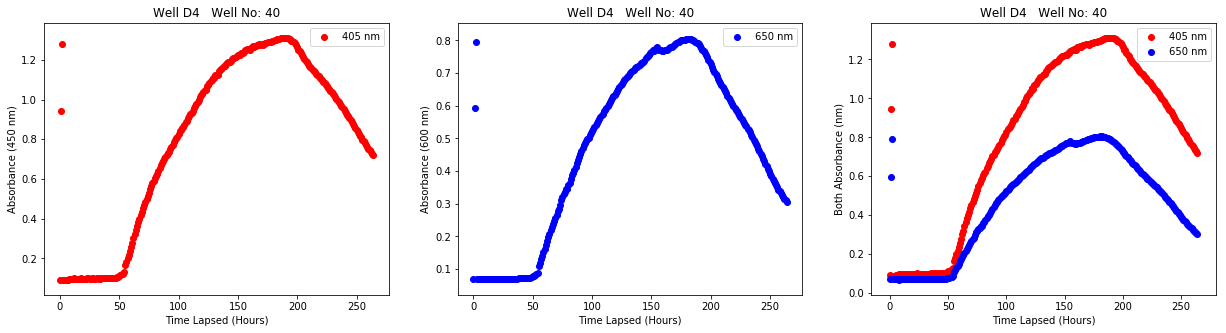

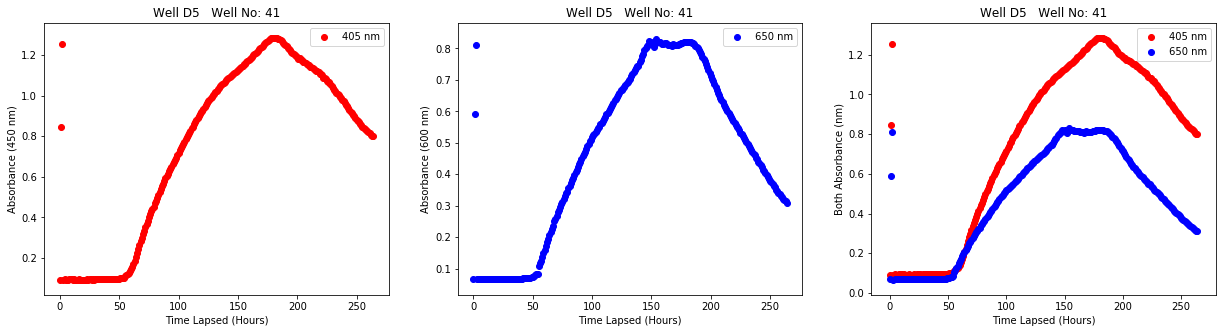

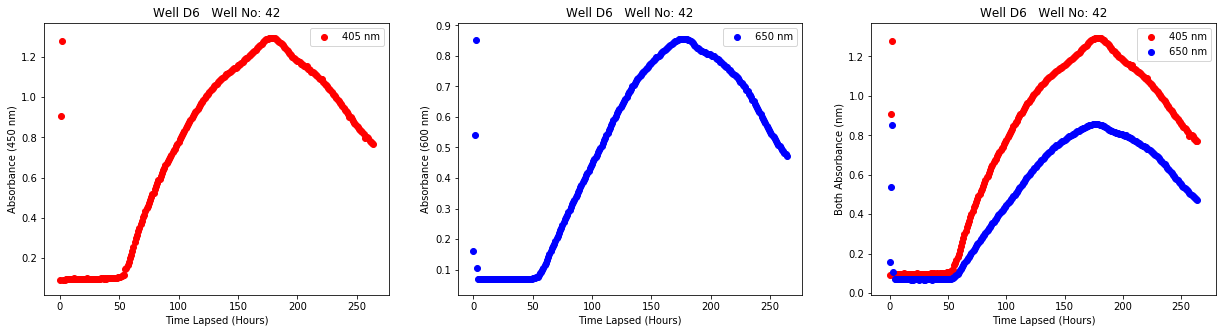

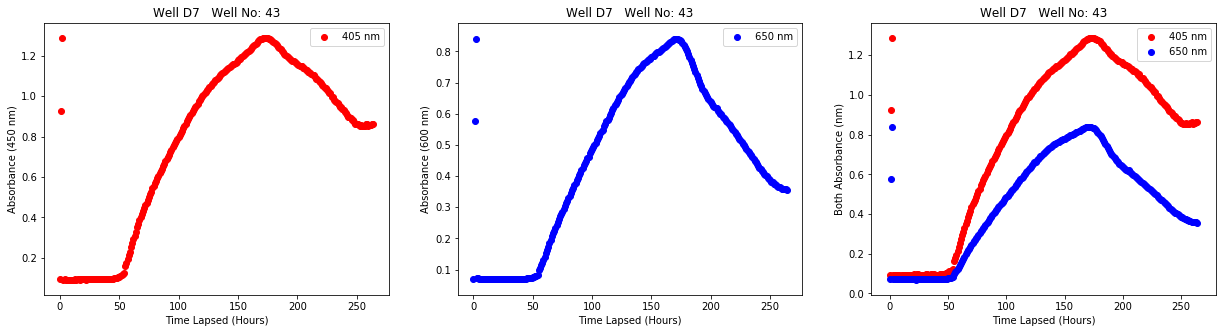

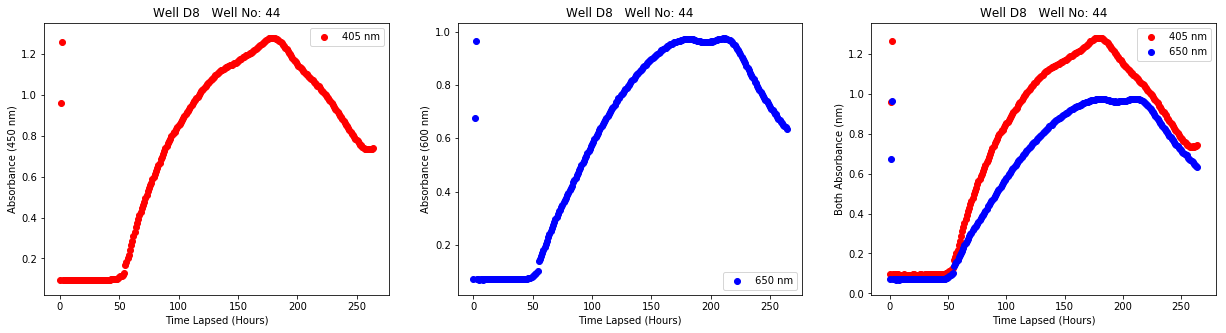

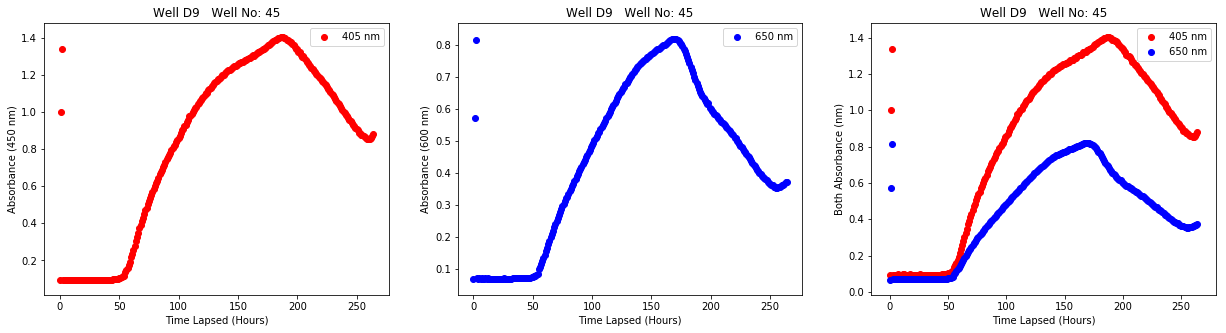

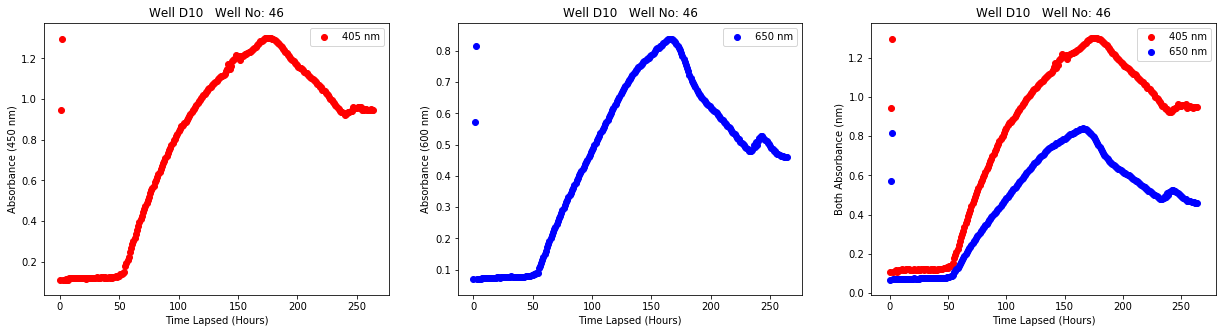

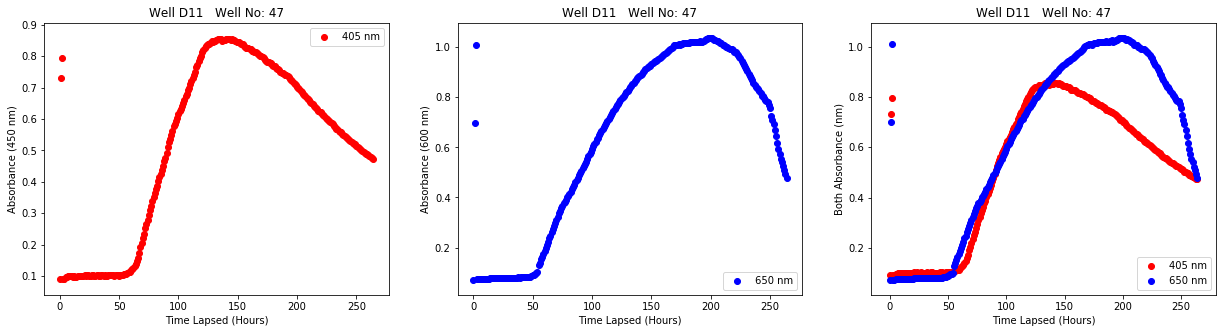

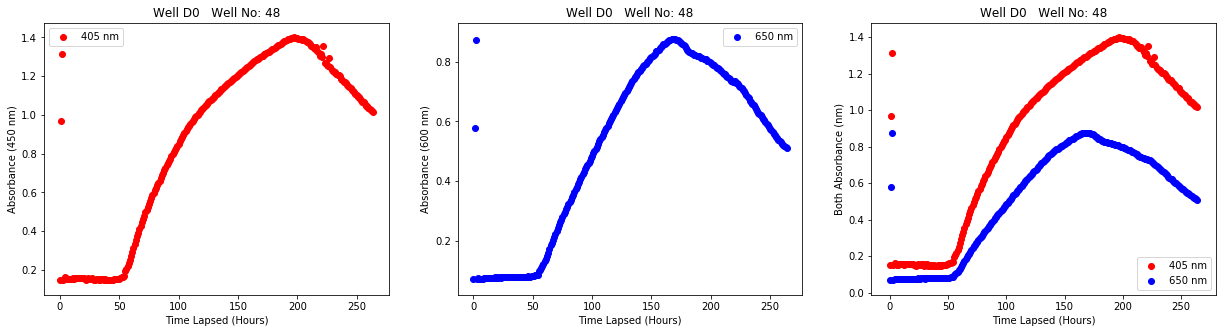

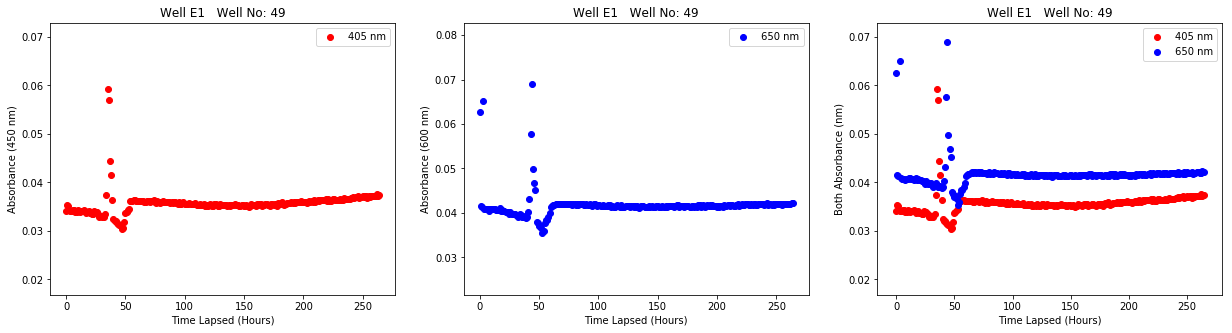

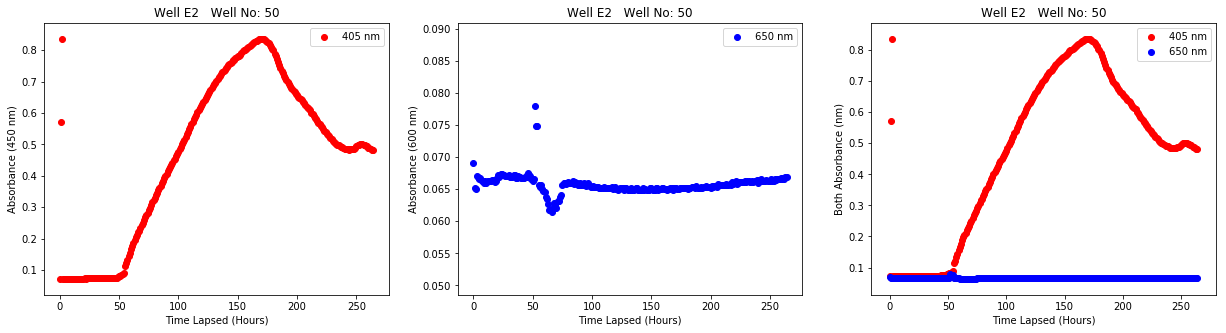

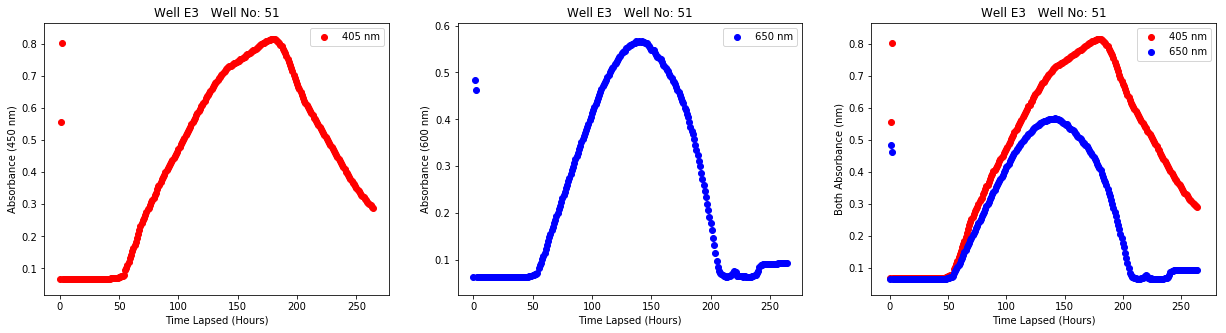

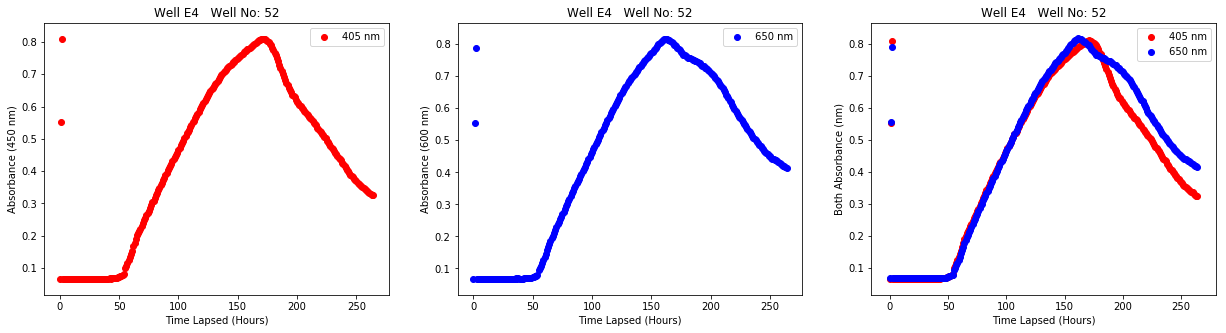

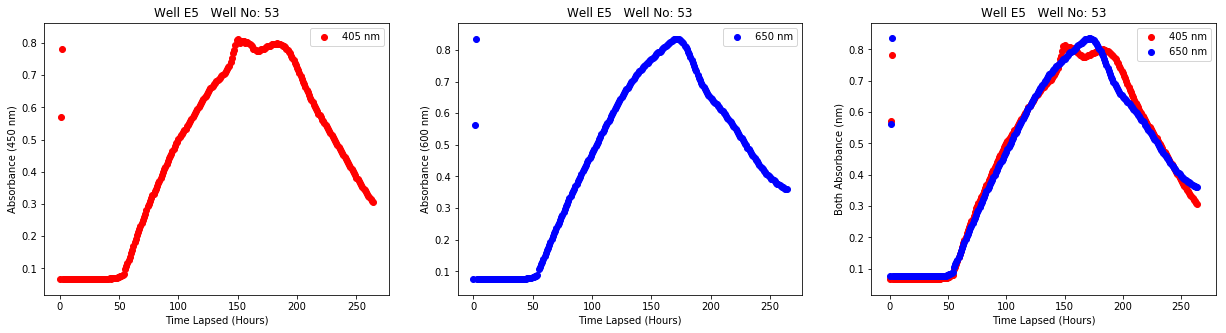

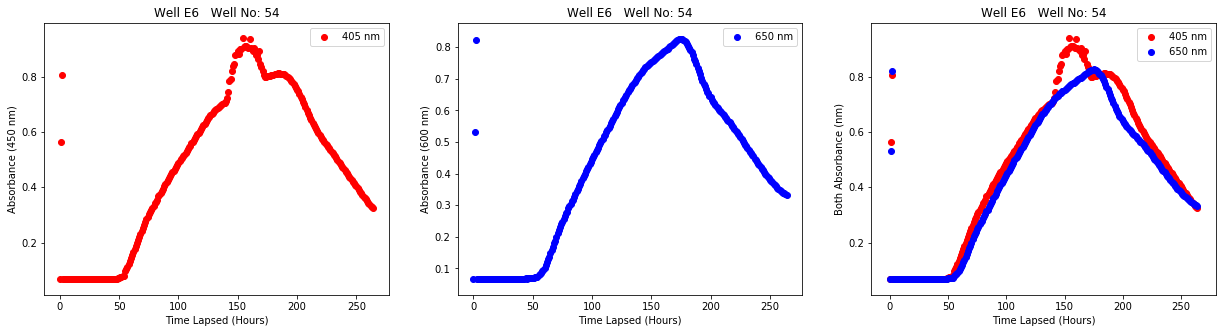

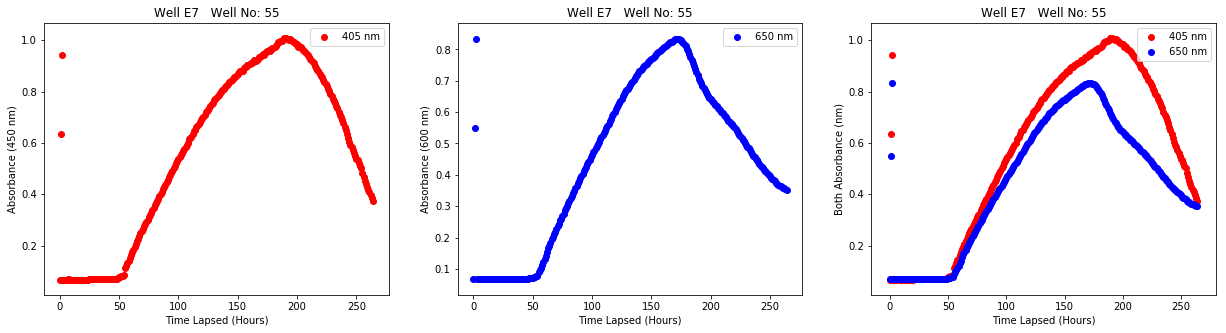

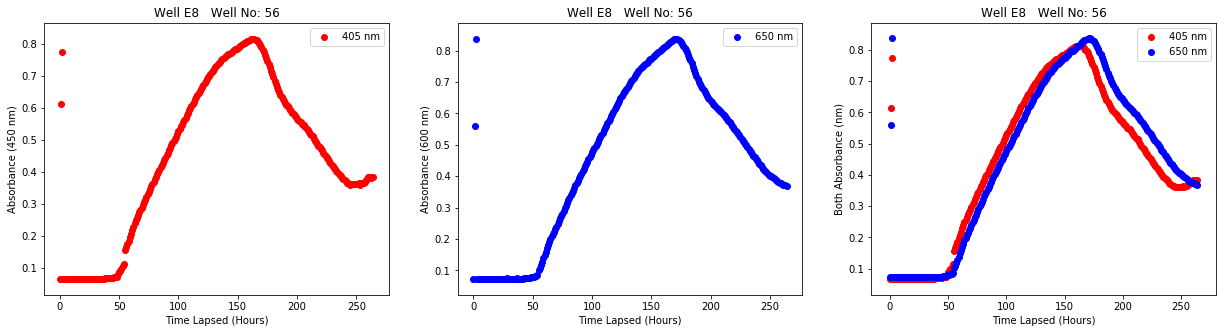

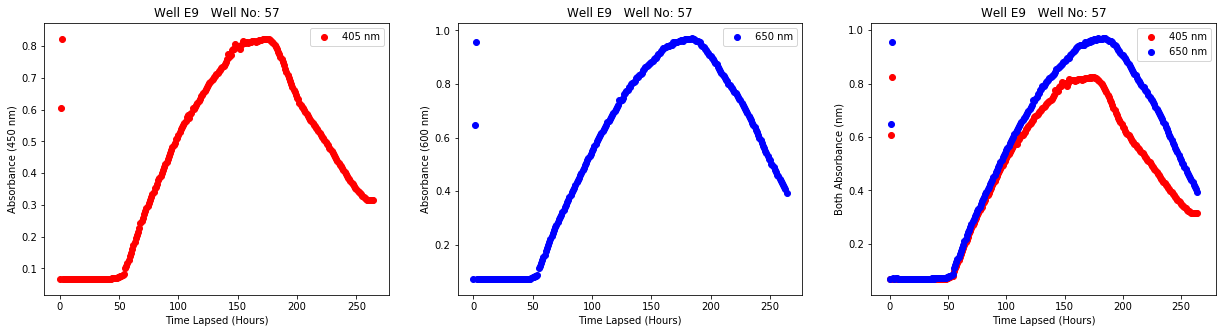

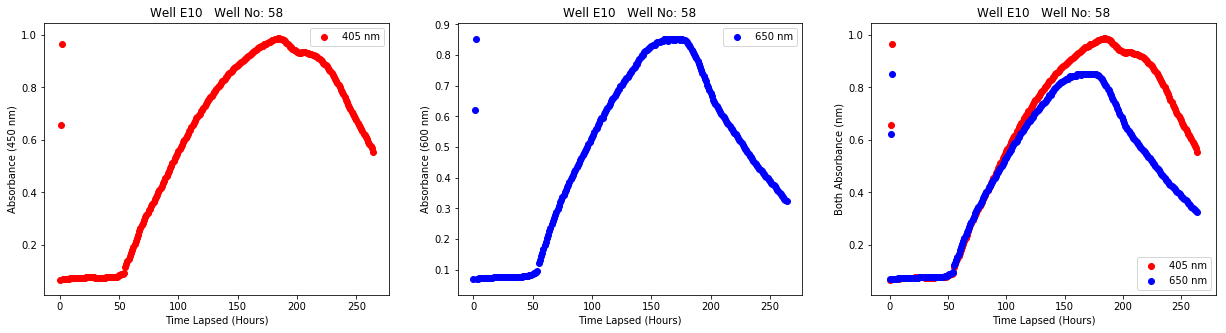

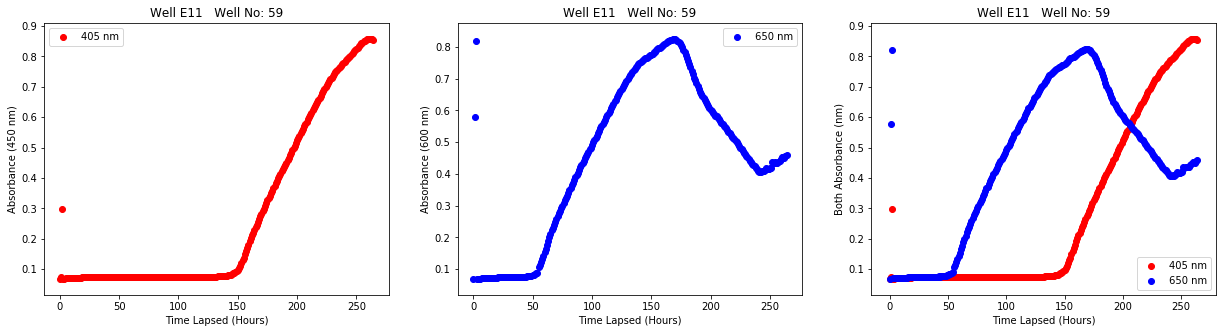

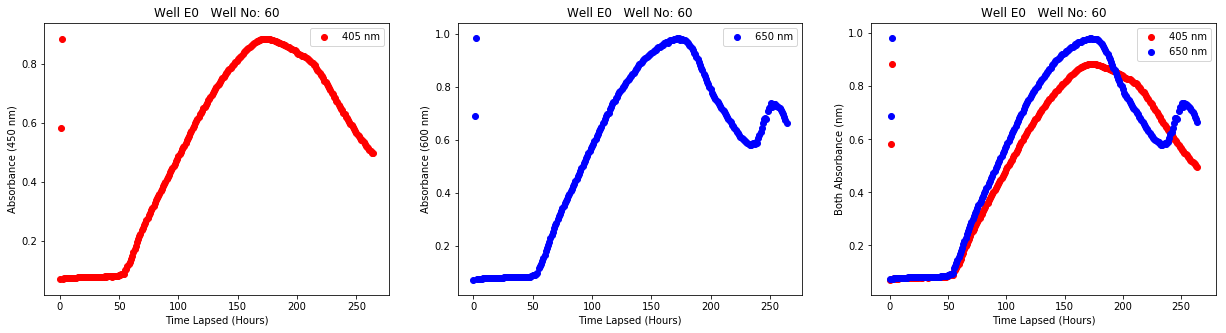

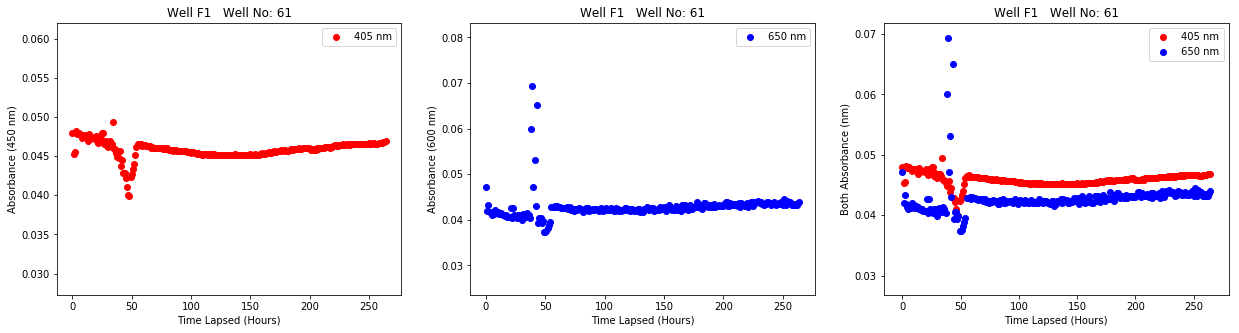

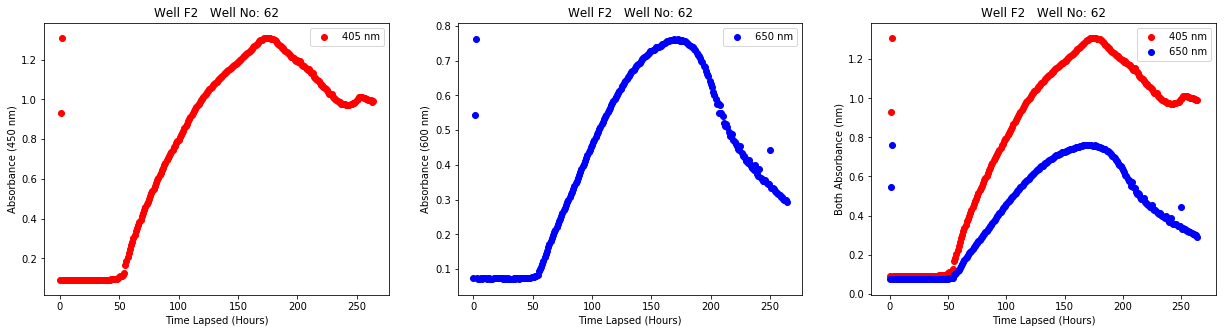

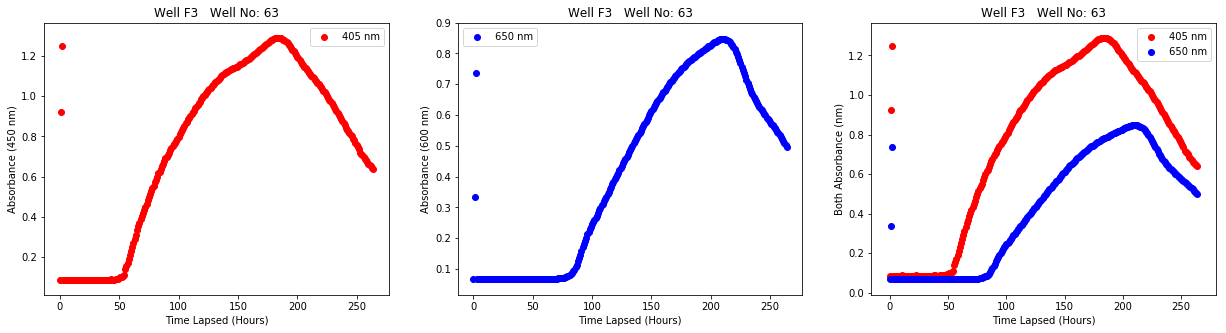

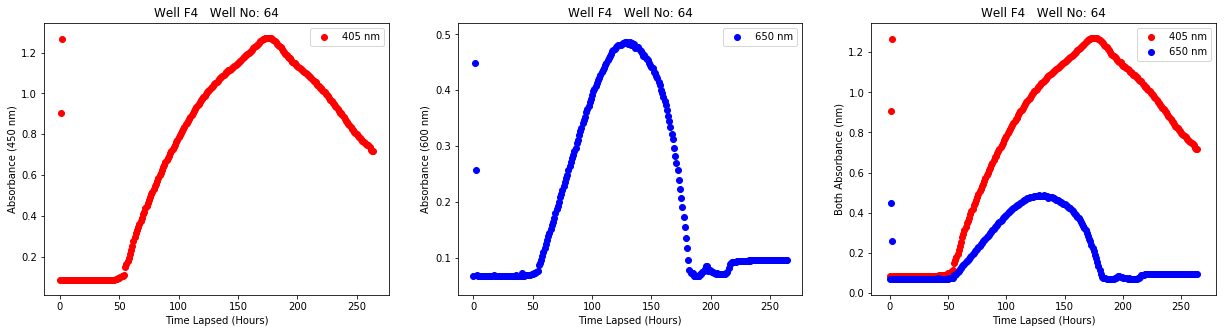

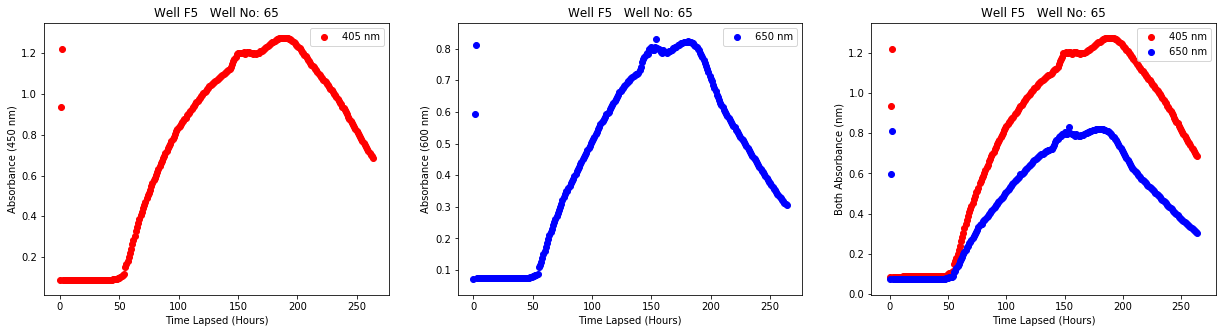

In [ ]:
if __name__ == "__main__":
    main()